# This notebook will try to choose the Best model from a category.

## Import the necessary library

In [2]:
import pandas as pd
from src.models.RandomForestClassifier import RFClassifier
from src.models.SVMClassifier import SVMClassifier
from src.models.NaiveBayesClassifier import NaiveBayesClassifier
from src.models.KNNClassifier import KNNClassifier
from src.models.LogisticRegClassifier import LogisticRegClassifier
from src.models.NNClassifier import NNClassifier

import os
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import time
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Logistic Regression Model Training Notebook

This Jupyter Notebook serves as a documentation and workflow for training the Logistic Regression model. 

## Data Processing

In the following cells, we import the necessary libraries and load the training and testing datasets as well as the trained models. There are 1 variable that can be changed depending on the model we want to compare:
* `model_choice` : RF | SVM | KNN | LR | NB | NN |


NOTE : Make sure you already made the datasets with the commands:
- `make data`
- `make features`

NOTE : Make sure you already trained the models or downloads them with the commands:
- `make download_models`

We also perform data preprocessing steps such as encoding labels. Other preprocessing steps such as removing correlations with pca, and scaling the data are done within the pipeline of the model.

In [3]:
#load testing data for outlier presence
test_with = pd.read_csv('../../data/processed/with_outliers/test.csv')
y_test_with = test_with["class"]
X_test_with = test_with.drop("class", axis=1)

#load the testing data without outlier
test_without = pd.read_csv('../../data/processed/without_outliers/test.csv')
y_test_without = test_without["class"]
X_test_without = test_without.drop("class", axis=1)

#load the training class to encode labels
y_train_with = pd.read_csv('../../data/processed/with_outliers/train.csv')["class"]
y_train_without = pd.read_csv('../../data/processed/without_outliers/train.csv')["class"]

#encode labels of testing class once fit on training class
label_encoder_with = LabelEncoder().fit(y_train_with)
y_test_with = label_encoder_with.transform(y_test_with)
label_encoder_without = LabelEncoder().fit(y_train_without)
y_test_without = label_encoder_without.transform(y_test_without)

In [18]:
# Set the type of model to use from this list: ['RF', 'SVM', 'KNN', 'LR', 'NB', 'NN']
model_choice = 'SVM'

models_dir = '../../models/'+model_choice+'/'

choice_clf = {'RF': RFClassifier(),
            'SVM': SVMClassifier(),
            'KNN': KNNClassifier(),
            'LR': LogisticRegClassifier(),
            'NB': NaiveBayesClassifier(),
            'NN': NNClassifier()}
models = {}
for filename in os.listdir(models_dir):
    clf = choice_clf[model_choice]
    clf.load(new_name=filename[:-7], path=models_dir)
    models[filename] = clf.model

## Evaluate the models

### Classification Report

In [19]:
reports = pd.DataFrame(columns=['model', 'inference Time (ms)', 'accuracy', 'f1_macro', 'f1_GALAXY', 'f1_QSO', 'f1_STAR'])
for name, model in models.items():
    print(name)
    #check if name has a certain string
    if "_without_" in name :
        start_time = time.time()
        y_pred = model.predict(X_test_without)
        end_time = time.time()
        inference_time = (end_time - start_time)/len(y_pred)
        print("Inference time: ", inference_time)
        class_report = classification_report(label_encoder_without.inverse_transform(y_test_without), label_encoder_without.inverse_transform(y_pred), output_dict=True)
        print(class_report)
    else:
        start_time = time.time()
        y_pred = model.predict(X_test_with)
        end_time = time.time()
        inference_time = (end_time - start_time)/len(y_pred)
        print("Inference time: ", inference_time)
        class_report = classification_report(label_encoder_with.inverse_transform(y_test_with), label_encoder_with.inverse_transform(y_pred), output_dict=True)
        print(class_report)
    report = {}
    report['inference Time (ms)'] = inference_time
    report['model'] = name
    report['accuracy'] = class_report['accuracy']
    report['f1_macro'] = class_report['macro avg']['f1-score']
    for i in label_encoder_with.classes_ :
        report[f'f1_{i}'] = class_report[f'{i}']['f1-score']
    reports = pd.concat([reports, pd.DataFrame([report])], ignore_index=True)

SVM_with_outliers_under.joblib
Inference time:  1.4086365699768066e-06
{'GALAXY': {'precision': 0.9725198755617006, 'recall': 0.946589284212297, 'f1-score': 0.9593793955926857, 'support': 11889.0}, 'QSO': {'precision': 0.8740871317048602, 'recall': 0.9153481012658228, 'f1-score': 0.8942419167847482, 'support': 3792.0}, 'STAR': {'precision': 0.9690374691496523, 'recall': 1.0, 'f1-score': 0.9842752962625343, 'support': 4319.0}, 'accuracy': 0.9522, 'macro avg': {'precision': 0.9385481588054043, 'recall': 0.9539791284927066, 'f1-score': 0.9459655362133228, 'support': 20000.0}, 'weighted avg': {'precision': 0.9531050016617619, 'recall': 0.9522, 'f1-score': 0.9524055993603544, 'support': 20000.0}}
SVM_with_outliers.joblib
Inference time:  1.161205768585205e-06


/tmp/ipykernel_196310/1009021133.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reports = pd.concat([reports, pd.DataFrame([report])], ignore_index=True)


{'GALAXY': {'precision': 0.9594706368899917, 'recall': 0.9756918159643367, 'f1-score': 0.9675132407523249, 'support': 11889.0}, 'QSO': {'precision': 0.9548741683540642, 'recall': 0.8705168776371308, 'f1-score': 0.9107463098358394, 'support': 3792.0}, 'STAR': {'precision': 0.9699079272400629, 'recall': 1.0, 'f1-score': 0.9847241222070223, 'support': 4319.0}, 'accuracy': 0.961, 'macro avg': {'precision': 0.9614175774947062, 'recall': 0.9487362312004892, 'f1-score': 0.9543278909317289, 'support': 20000.0}, 'weighted avg': {'precision': 0.9608530793066777, 'recall': 0.961, 'f1-score': 0.9604669205007013, 'support': 20000.0}}
SVM_without_outliers_under.joblib
Inference time:  8.70401660601298e-07
{'GALAXY': {'precision': 0.97336860670194, 'recall': 0.9511417492460147, 'f1-score': 0.9621268250163434, 'support': 11605.0}, 'QSO': {'precision': 0.8799896986865825, 'recall': 0.9187953751008335, 'f1-score': 0.898973954222573, 'support': 3719.0}, 'STAR': {'precision': 0.9746039728438521, 'recall':

Text(0.5, 1.0, 'Comparison of main metrics for different models')

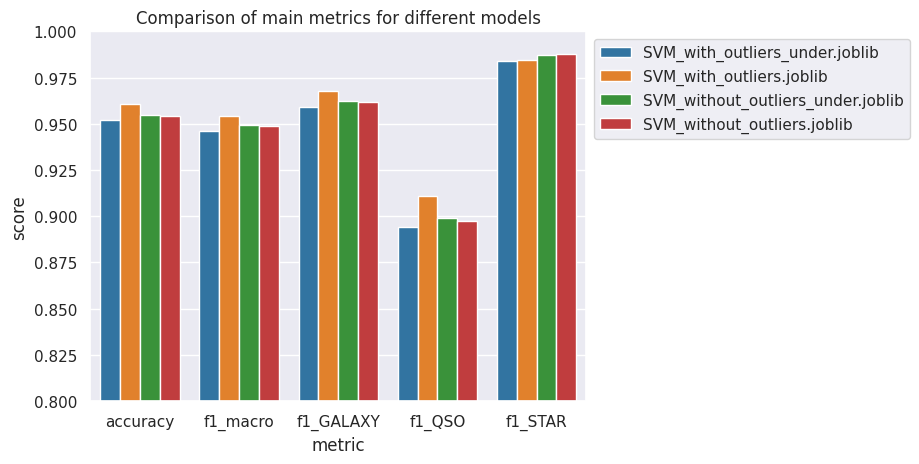

In [20]:
reshaped_reports = reports.melt(id_vars=['model'], value_vars=reports.columns[2:], var_name='metric', value_name='score')

ax = sns.barplot(data=reshaped_reports, x='metric', y='score', hue='model')
ax.set(ylim=(0.8, 1))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Comparison of main metrics for different models')

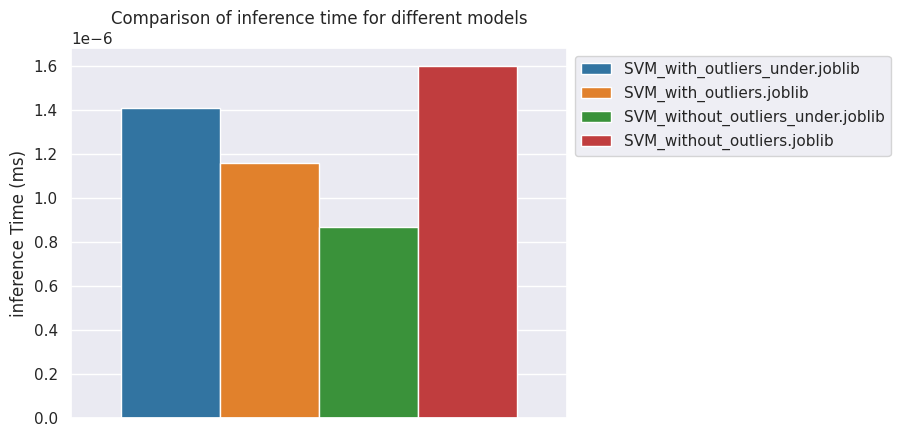

In [21]:
ax = sns.barplot(data=reports, y='inference Time (ms)', hue='model', )
ax.set_title('Comparison of inference time for different models')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))